In [78]:
from supportFunctions import *
import cPickle as pickle
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree



In [79]:
def extractFeatures(imageDict, dist = 4):
    n = imageDict['numPointsInBox']
    y = np.zeros(n)
    
    v1,v2,h1,h2 = imageDict['boxEdges']
    
    img = imageDict['image1bit']
    featuresList = []
    
    fingerSet = imageDict['allFingerPoints']

    c = 0 
    for i in range(h1,h2):
        for j in range(v1,v2):
            x_matrix  = img[i-dist-1:i+dist , j-dist-1: j+dist]
            xVec = x_matrix.ravel()
            featuresList.append(xVec)
            
            if max(np.sum([i , j] == fingerSet, axis = 1 )) == 2:
                y[c] = 1
            
            c = c + 1

    X = np.vstack((featuresList))
    return(X,y)
    

In [80]:
def extractExamplesFromList(imageList, dist = 4):
    allFeaturesList = []
    allTargetList = []

    for i, imageDict in enumerate(imageList):
        features, target = extractFeatures(imageDict, dist = dist)
        allFeaturesList.append(features)
        allTargetList.append(target)

    x = np.vstack((allFeaturesList))
    y = np.hstack((allTargetList))
    
    return x, y

In [81]:
def Reshape_to_yHatMatrix(testingExamples, yHat):
    number_of_images = len(testingExamples)
    
    image_sizes = []
    result = []
    c = 0 
    for i in range(number_of_images):
        dummy_idx = (testingExamples[i]['boxHeight'],testingExamples[i]['boxWidth'])
        image_sizes.append(dummy_idx)
        
        test_im = yHat[c:(c + dummy_idx[0]*dummy_idx[1])] 
        c = c + (dummy_idx[0] * dummy_idx[1])
        
        test_im_matrix = test_im.reshape((dummy_idx[0], dummy_idx[1]))
        result.append(test_im_matrix)
    
    return(result)

In [82]:
pickleFileName = 'fingerDataSet' + '.pickle'
pickleFile = open(pickleFileName, 'rb')
data = pickle.load(pickleFile)
pickleFile.close()

In [83]:
#Constructing Traning Data Set:
trainingExampleIndices = np.arange(0,39)
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = extractExamplesFromList(trainingExamples, dist = 4)

#Constructing Test Data Set:
testingExampleIndices = [40, 41, 42, 43]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = extractExamplesFromList(testingExamples, dist = 4)


In [84]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(trainX, trainY)
yHat = clf.predict(testX)

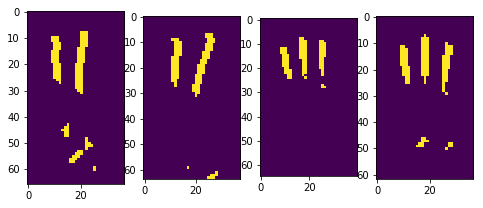

In [85]:

Y_hat = Reshape_to_yHatMatrix(testingExamples, yHat)

fig = plt.figure(0, (8, 4))
plt.subplot(1,4,1)
plt.imshow(Y_hat[0])

plt.subplot(1,4,2)
plt.imshow(Y_hat[1])

plt.subplot(1,4,3)
plt.imshow(Y_hat[2])

plt.subplot(1,4,4)
plt.imshow(Y_hat[3])
plt.show()

In [86]:
Y_hat[0].shape

(66L, 37L)

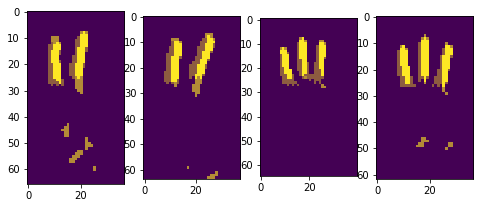

In [87]:
Y_hat = Reshape_to_yHatMatrix(testingExamples, yHat)
Y_test = Reshape_to_yHatMatrix(testingExamples, testY)

fig = plt.figure(0, (8, 4))
plt.subplot(1,4,1)
plt.imshow(Y_hat[0])
plt.imshow(Y_test[0], alpha = 0.4)

plt.subplot(1,4,2)
plt.imshow(Y_hat[1])
plt.imshow(Y_test[1], alpha = 0.4)

plt.subplot(1,4,3)
plt.imshow(Y_hat[2])
plt.imshow(Y_test[2], alpha = 0.4)

plt.subplot(1,4,4)
plt.imshow(Y_hat[3])
plt.imshow(Y_test[3], alpha = 0.4)

plt.show()

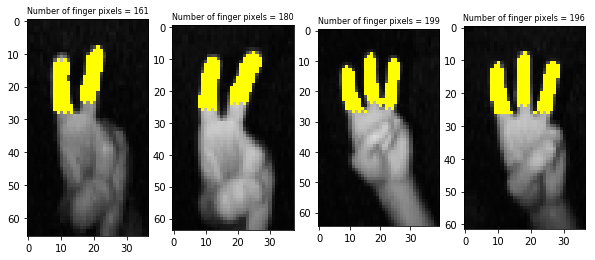

In [88]:
#exampleIndices = [7, 30, 46]
exampleIndices = [40, 41, 42, 43]
fig = plt.figure(0, (10, 6))

for i in range(len(exampleIndices)):
    fig.add_subplot(1,len(exampleIndices),i+1)
    imageDict = data[exampleIndices[i]]
    
    X1, y1 = extractFeatures(imageDict, dist = 4)    
    yImage = y1.reshape(imageDict['boxHeight'], imageDict['boxWidth'])
    
    im = makeGrayScale(imageDict)
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 1
    im[:,:,1][yImage==1] = 1
    im[:,:,2][yImage==1] = 0
    
    plt.imshow(im, interpolation = 'none')
    plt.title('Number of finger pixels = ' + str(sum(y1==1)), fontsize = 8)

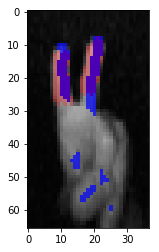

In [89]:
imageDicto = data[40]
    
X1, y1 = extractFeatures(imageDicto, dist = 4)    
yImage = y1.reshape(imageDicto['boxHeight'], imageDicto['boxWidth'])
im = makeGrayScale(imageDicto)
im2 = im.copy()
#Paint with matches:
im[:,:,0][yImage==1] = 1
im[:,:,1][yImage==1] = 0
im[:,:,2][yImage==1] = 0

im2[:,:,0][Y_hat[0]==1] = 0
im2[:,:,1][Y_hat[0]==1] = 0
im2[:,:,2][Y_hat[0]==1] = 1

plt.imshow(im2, interpolation = 'none')
plt.imshow(im, interpolation = 'none', alpha = 0.3)

plt.show()

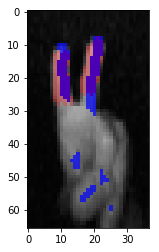

In [90]:
imageDicto = data[40]
    
im = makeGrayScale(imageDicto)
im2 = im.copy()
#Paint with matches:
im[:,:,0][Y_test[0]==1] = 1
im[:,:,1][Y_test[0]==1] = 0
im[:,:,2][Y_test[0]==1] = 0

im2[:,:,0][Y_hat[0]==1] = 0
im2[:,:,1][Y_hat[0]==1] = 0
im2[:,:,2][Y_hat[0]==1] = 1

plt.imshow(im2, interpolation = 'none')
plt.imshow(im, interpolation = 'none', alpha = 0.3)

plt.show()

In [91]:
Y_test[0].shape, yImage.shape, Y_hat[0].shape

((66L, 37L), (66L, 37L), (66L, 37L))

In [92]:
#Turn into a function:

def plots_estimates_and_actuals(testingExampleIndices,yHat, testY):
    fig = plt.figure(0, (8, 6))
    Y_hat = Reshape_to_yHatMatrix(testingExamples, yHat)
    Y_test = Reshape_to_yHatMatrix(testingExamples, testY)
    for i in range(len(testingExampleIndices)):
        
        fig.add_subplot(1,len(testingExampleIndices),i+1)
        imageDict = data[testingExampleIndices[i]]
        im = makeGrayScale(imageDict)
        im2 = im.copy()
        
        #Paint with matches:
        im[:,:,0][Y_test[i]==1] = 1
        im[:,:,1][Y_test[i]==1] = 0
        im[:,:,2][Y_test[i]==1] = 0

        im2[:,:,0][Y_hat[i]==1] = 0
        im2[:,:,1][Y_hat[i]==1] = 0
        im2[:,:,2][Y_hat[i]==1] = 1
        
        plt.imshow(im2, interpolation = 'none')
        plt.imshow(im, interpolation = 'none', alpha = 0.3)
    plt.show()

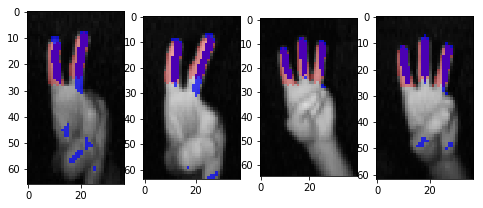

In [93]:
plots_estimates_and_actuals(testingExampleIndices,yHat, testY)

In [94]:
Y_hat = Reshape_to_yHatMatrix(testingExamples, yHat)
Y_test = Reshape_to_yHatMatrix(testingExamples, testY)
def plots_estimates_and_actuals2(testingExampleIndices,  Y_test, Y_hat):
    fig = plt.figure(0, (8, 6))
    for i in range(len(testingExampleIndices)):
        
        fig.add_subplot(1,len(testingExampleIndices),i+1)
        
        plt.imshow(Y_test[i])
        plt.imshow(Y_hat[i], alpha = 0.4)
    plt.show()

In [95]:
 range(len(testingExampleIndices))

[0, 1, 2, 3]

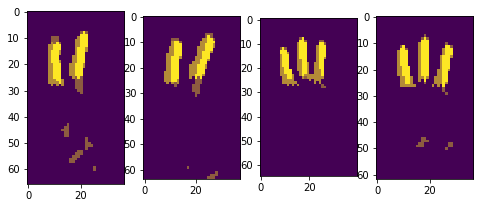

In [96]:
plots_estimates_and_actuals2(testingExampleIndices, Y_test, Y_hat)

In [39]:
testingExampleIndices

[50, 51, 52, 53]